# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data
labels = pd.read_csv('../data/raw/labels.csv', index_col=0)
labels.head()

,filename,label
image_id,,
1,1.jpg,2
2,2.jpg,4
3,3.jpg,2
4,4.jpg,3
5,5.jpg,5


Text(0.5, 1.0, 'Distribution of Labels')

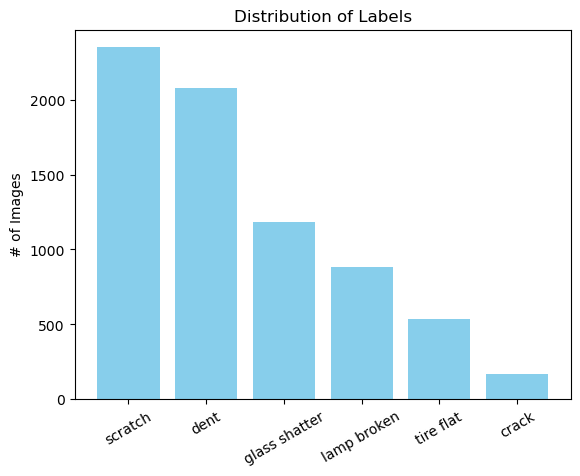

In [5]:
label_code = pd.Series({1: 'crack', 2: 'scratch', 3: 'tire flat', 4: 'dent', 5: 'glass shatter', 6: 'lamp broken'})

label_counts = labels['label'].value_counts()
plt.bar(label_code[label_counts.index], label_counts, color='skyblue')
plt.tick_params(axis='x', rotation=30)
plt.ylabel('# of Images')
plt.title('Distribution of Labels')

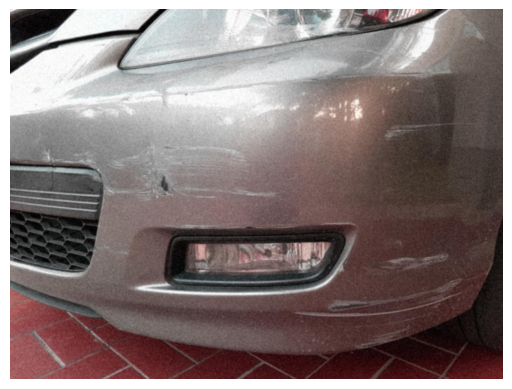

In [24]:
image = Image.open(f'../data/raw/images/{labels[labels["label"] == 2]["filename"].values[1]}')
plt.imshow(image)
plt.axis('off')
plt.show()

In [27]:
np.array(image).shape

(1026, 1368, 3)

In [29]:
np.array(image.crop([100,100,900,900])).shape

(800, 800, 3)

Weighted F1: 0.257
Accuracy: 0.274


In [11]:
sizes = []
for file in labels["filename"].values[:500]:
    img = Image.open(f'../data/raw/images/{file}').convert('L')
    sizes.append(np.array(img).shape)
print('avg img size:', np.mean(sizes, axis=0))
print('reduce length & width by factor of 5.35:', np.mean(sizes, axis=0)//5.35)

avg img size: [ 804.558 1073.238]
reduce length & width by factor of 5.35: [150. 200.]


I will use a standard size of (150, 200), and crop 10 pixels on each side to end up with (130, 180)

## Preprocess Image Data

In [ ]:
import sys
sys.path.append('../')
import src.data_loader as dl

dl.process_raw_img_data()

In [3]:
import sys
sys.path.append('../')
import src.data_loader as dl
X_train, y_train = dl.load_data('../data/processed/train/images')

In [5]:
X_train.shape

(5623, 130, 180)

In [6]:
y_train.shape

(5623,)

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Available devices:", tf.config.list_physical_devices())

TensorFlow version: 2.17.0
Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
